In [2]:
import numpy as np

import sympy as sym

import itertools

In [3]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "../src/main.py").load_module()

from main import *

In [4]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 13

## The case of two bits strategies

To test the formulation we compare the following payoffs.

In [6]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        ss_one_bit @ np.array([b - c, -c, b, 0]), ss_two_bit @ payoffs_vector(c, b)
    )

**Cooperation**

In [7]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])

    two_bit_M = transition_matrix(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2], bits=4)

    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)

    assert np.isclose(
        cooperation_rate(ss_one_bit, size=4), cooperation_rate(ss_two_bit, size=16)
    )

## The case of two bits strategies

In [8]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, p3, p4, q1, q2, q3, q4 = np.random.random(8)

    two_bit_M = transition_matrix(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4], bits=4)

    three_bit_M = transition_matrix(
        p=[p1, p2, p3, p4, p1, p2, p3, p4], q=[q1, q2, q3, q4, q1, q2, q3, q4], bits=8
    )

    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)

    assert np.isclose(
        ss_two_bit @ payoffs_vector(c, b), ss_three_bit @ payoffs_vector(c, b, dim=16)
    )

In [9]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):

    p1, p2, q1, q2 = np.random.random(4)

    two_bit_M = transition_matrix(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4], bits=4)

    three_bit_M = transition_matrix(
        p=[p1, p2, p3, p4, p1, p2, p3, p4], q=[q1, q2, q3, q4, q1, q2, q3, q4], bits=8
    )

    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)

    assert np.isclose(
        cooperation_rate(ss_two_bit, size=16), cooperation_rate(ss_three_bit, size=64)
    )

## The case of four bits strategies

In [10]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(100):
    p1, p2, p3, p4, p5, p6, p7, p8, q1, q2, q3, q4, q5, q6, q7, q8 = np.random.random(
        16
    )

    m_four_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8, p1, p2, p3, p4, p5, p6, p7, p8),
        (q1, q2, q3, q4, q5, q6, q7, q8, q1, q2, q3, q4, q5, q6, q7, q8),
        bits=16,
    )

    m_three_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8), (q1, q2, q3, q4, q5, q6, q7, q8), bits=8
    )

    ss_four = invariant_distribution(m_four_bits)
    ss_three = invariant_distribution(m_three_bits)

    assert np.isclose(
        ss_four @ payoffs_vector(c, b, dim=64), ss_three @ payoffs_vector(c, b, dim=16)
    )

In [11]:
(16 ** 2) / 4

64.0

In [12]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(100):
    p1, p2, p3, p4, p5, p6, p7, p8, q1, q2, q3, q4, q5, q6, q7, q8 = np.random.random(
        16
    )

    m_four_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8, p1, p2, p3, p4, p5, p6, p7, p8),
        (q1, q2, q3, q4, q5, q6, q7, q8, q1, q2, q3, q4, q5, q6, q7, q8),
        bits=16,
    )

    m_three_bits = transition_matrix(
        (p1, p2, p3, p4, p5, p6, p7, p8), (q1, q2, q3, q4, q5, q6, q7, q8), bits=8
    )

    ss_four = invariant_distribution(m_four_bits)
    ss_three = invariant_distribution(m_three_bits)

    assert np.isclose(
        cooperation_rate(ss_three, size=64), cooperation_rate(ss_four, size=256)
    )

**Checks for matlab code**

**The two bits case**

In [13]:
np.random.seed(100)
p1, p2 = np.random.random(4), np.random.random(4)

In [14]:
p1, p2

(array([0.54340494, 0.27836939, 0.42451759, 0.84477613]),
 array([0.00471886, 0.12156912, 0.67074908, 0.82585276]))

In [15]:
M = transition_matrix(p1, p2, bits=4)

ss = invariant_distribution(M)

In [16]:
ss

array([0.02770631, 0.0540767 , 0.03207052, 0.06290837, 0.06055705,
       0.27718485, 0.02476668, 0.09362911, 0.02902366, 0.02994831,
       0.03106764, 0.03119363, 0.05947489, 0.09492782, 0.0333284 ,
       0.05813606])

In [17]:
c = 0.1

In [18]:
b = 1

In [19]:
ss @ payoffs_vector(c, b)

0.23470518518107092

In [20]:
cooperation_rate(ss, size=4 ** 2)

0.6328995842008454

**The three bits case**

In [ ]:
np.random.seed(200)
sdim = 8

p1, p2 = np.random.random(sdim), np.random.random(sdim)

In [ ]:
p1, p2

In [ ]:
M = transition_matrix(p1, p2, bits=8)

ss = invariant_distribution(M)

In [ ]:
c, b = 0.1, 1

In [ ]:
ss @ payoffs_vector(c, b, dim=16)

In [ ]:
cooperation_rate(ss, sdim ** 2)

**The four bits case**

In [ ]:
np.random.seed(300)
bits = 16

p1, p2 = np.random.random(bits), np.random.random(bits)

In [ ]:
p1, p2

In [ ]:
M = transition_matrix(p1, p2, bits=bits)

ss = invariant_distribution(M)

In [ ]:
ss @ payoffs_vector(c, b, dim=64)

In [ ]:
cooperation_rate(ss, bits ** 2)

## Evolutionary simulations

In [7]:
import pandas as pd

import numpy as np

In [2]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [3]:
names1 = [f"p_{i}" for i in range(1, 3)] + ["t", "cooperation"]
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
names3 = [f"p_{i}" for i in range(1, 9)] + ["t", "cooperation"]
names4 = [f"p_{i}" for i in range(1, 17)] + ["t", "cooperation"]

dfs1 = [
    [pd.read_csv(f"../matlab_data/bits_2_beta_0.1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_4_beta_0.1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_8_beta_0.1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs2 = [
    [pd.read_csv(f"../matlab_data/bits_2_beta_1_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_4_beta_1_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_8_beta_1_seed_1_c_{c}.csv", names=names3) for c in cs],
]

dfs3 = [
    [pd.read_csv(f"../matlab_data/bits_2_beta_10_seed_1_c_{c}.csv", names=names1) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_4_beta_10_seed_1_c_{c}.csv", names=names2) for c in cs],
    [pd.read_csv(f"../matlab_data/bits_8_beta_10_seed_1_c_{c}.csv", names=names3) for c in cs],
]

In [4]:
dfs1 = [[df.drop_duplicates() for df in dfs] for dfs in dfs1]
dfs2 = [[df.drop_duplicates() for df in dfs] for dfs in dfs2]
dfs3 = [[df.drop_duplicates() for df in dfs] for dfs in dfs3]

In [5]:
def frequencies(dfs, max_steps=10 ** 7):

    for df in dfs:
        frequencies = []
        previous = 0
        for value in df["t"][1:]:
            frequencies.append(value - previous)
            previous = value
        frequencies.append(max_steps - previous)

        df["frequencies"] = np.array(frequencies)
        df["frequencies norm"] = np.array(frequencies) / max_steps

    return dfs

In [8]:
df_beta_pnt = [frequencies(dfs) for dfs in dfs1[:-1]] + [frequencies(dfs1[-1], (2 * 10 ** 7))]
df_beta_one = [frequencies(dfs) for dfs in dfs2[:-1]] + [frequencies(dfs2[-1], (2 * 10 ** 7))]
df_beta_ten = [frequencies(dfs) for dfs in dfs3[:-1]] + [frequencies(dfs3[-1], (2 * 10 ** 7))]

In [9]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=10"]

In [12]:
# df5 = [pd.read_csv(f"../matlab_data/bits_16_beta_0.1_seed_1_c_{c}.csv", names=names4) for c in cs]
# df5 = [df.drop_duplicates() for df in df5]
# df5 = frequencies(df5, 10 ** 6)

# sxt_bits_points = [sum(df["frequencies norm"] * df["cooperation"]) for df in df5]

In [13]:
# df5 = [pd.read_csv(f"../matlab_data/bits_16_beta_1_seed_1_c_{c}.csv", names=names4) for c in cs]
# df5 = [df.drop_duplicates() for df in df5]
# df5 = frequencies(df5, 10 ** 6)

# sxt_bits_one_points = [sum(df["frequencies norm"] * df["cooperation"]) for df in df5]

In [93]:
c = "yellowgreen"

In [94]:
matplotlib.colors.to_hex(c, keep_alpha=False)

'#9acd32'

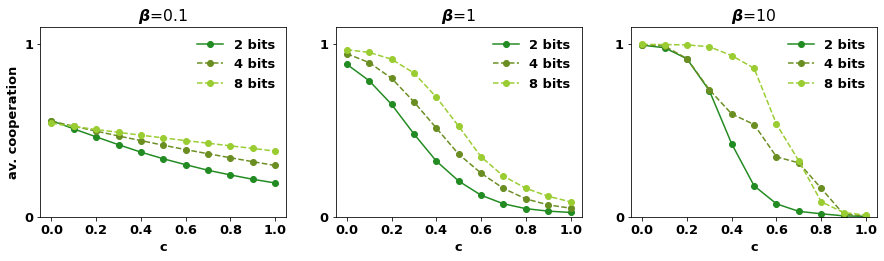

In [104]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5))

for i, gdfs in enumerate([df_beta_pnt, df_beta_one, df_beta_ten]):

    points = [
        [sum(df["frequencies norm"] * df["cooperation"]) for df in dfs] for dfs in gdfs
    ]

    axes[i].plot(np.linspace(0, 1, 11), points[0], "-o", label="2 bits", color="forestgreen")
    axes[i].plot(np.linspace(0, 1, 11), points[1], "--o", label="4 bits", color="olivedrab")
    axes[i].plot(np.linspace(0, 1, 11), points[2], "--o", label="8 bits", color="yellowgreen")

    axes[i].set_ylim(0, 1.1)

    axes[i].set_yticks(np.arange(0, 2))

    axes[i].set_xlabel("c")

    axes[i].legend(framealpha=0)
    axes[i].set_title(labels[i])

axes[0].set_ylabel("av. cooperation");

# axes[0].plot(np.linspace(0, 1, 11), sxt_bits_points, "--o", label="4 bit");
# axes[1].plot(np.linspace(0, 1, 11), sxt_bits_one_points, "--o", label="4 bit");

axes[0].legend(framealpha=0);
axes[1].legend(framealpha=0);

# plt.savefig("../static/average_cooperation_over_c_with_diff_selection_strength.pdf", bbox_inches='tight')

plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/cooperation_results.png", 
            transparent=True,  bbox_inches='tight')

In [22]:
dfs = [
    pd.read_csv(f"../data/matlab_one_bit_beta_1_seed_{seed}_c_0.3.csv", names=names2)
    for seed in range(1, 11)
]


df2s = [
    pd.read_csv(f"../data/matlab_two_bits_beta_1_seed_{seed}_c_0.3.csv", names=names2)
    for seed in range(1, 11)
]

In [23]:
df3s = [
    pd.read_csv(f"../data/matlab_three_bits_beta_1_seed_{seed}_c_0.3.csv",
                names=names3)
    for seed in range(1, 11)
]

In [24]:
dfs = [df.drop_duplicates() for df in dfs]

df2s = [df.drop_duplicates() for df in df2s]

df3s = [df.drop_duplicates() for df in df3s]

In [25]:
dfs = frequencies(dfs)

df2s = frequencies(df2s)

df3s = frequencies(df3s)

In [31]:
abundance = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in dfs
]

In [32]:
abundance

[(0.999077706, 0.272381689, 11409.0),
 (0.998094672, 0.147926946, 19813.0),
 (0.999102867, 0.13973607, 12971.0),
 (0.997207496, 0.250597542, 13342.0),
 (0.999562623, 0.180350025, 19055.0),
 (0.999452954, 0.203475467, 17483.0),
 (0.998750096, 0.126108388, 22880.0),
 (0.998432868, 0.139104891, 16087.0),
 (0.999440962, 0.137205541, 20469.0),
 (0.997451795, 0.211886271, 17006.0)]

In [33]:
abundance2 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in df2s
]

In [34]:
abundance3 = [
    (
        df.iloc[df["frequencies"].idxmax()]["p_1"],
        df.iloc[df["frequencies"].idxmax()]["p_2"],
        df.iloc[df["frequencies"].idxmax()]["p_3"],
        df.iloc[df["frequencies"].idxmax()]["p_4"],
        df.iloc[df["frequencies"].idxmax()]["p_5"],
        df.iloc[df["frequencies"].idxmax()]["p_6"],
        df.iloc[df["frequencies"].idxmax()]["p_7"],
        df.iloc[df["frequencies"].idxmax()]["p_8"],
        df.iloc[df["frequencies"].idxmax()]["frequencies"]
    )
    for df in df3s
]

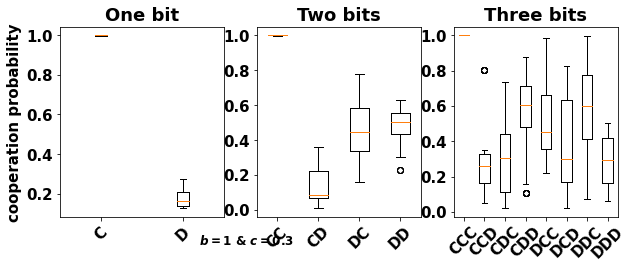

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3.5))

data = [[b[i] for b in abundance] for i in range(2)]

for i in range(2):
    axes[0].boxplot(data)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C", "D"], rotation=45)
axes[0].set_title("One bit", fontweight="bold")

axes[0].set_ylabel("cooperation probability")

data = [[b[i] for b in abundance2] for i in range(4)]


for i in range(4):
    axes[1].boxplot(data)

axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"], rotation=45)
axes[1].set_title("Two bits", fontweight="bold")

data = [[b[i] for b in abundance3] for i in range(8)]

for i in range(8):
    axes[2].boxplot(data)

axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["CCC", "CCD", "CDC", "CDD", "DCC", "DCD", "DDC", "DDD"], rotation=45)
axes[2].set_title("Three bits", fontweight="bold");

axes[1].text(-0.9, -0.2, "$b=1$ & $c=0.3$", fontsize=12);

**Sanity check cooperations**

In [56]:
from operator import itemgetter

max(abundance, key=itemgetter(2))[:2]

(0.998750096, 0.126108388)

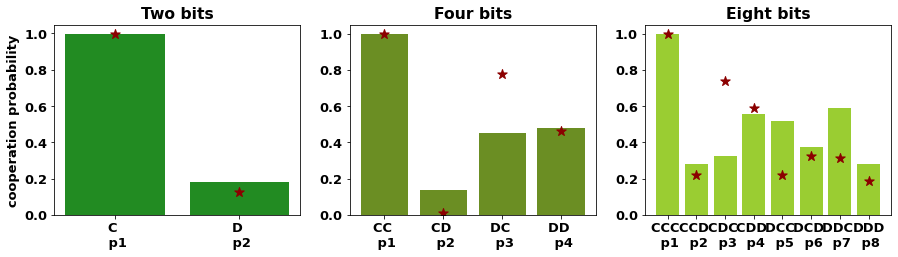

In [102]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5))

heights = [[b[i] for b in abundance] for i in range(2)]

errors = [np.std(h) for h in heights]

for i in range(2):
    axes[0].bar(i + 1, np.mean(heights[i]), color="forestgreen")
    
for i, point in enumerate(max(abundance, key=itemgetter(2))[:2]):
    axes[0].scatter(i + 1, point, marker="*", color='darkred', s=100)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C \n p1", "D \n p2"])
axes[0].set_title("Two bits", fontweight="bold")

axes[0].set_ylabel("cooperation probability")

heights = [[b[i] for b in abundance2] for i in range(4)]
errors = [np.std(h) for h in heights]

for i in range(4):
    axes[1].bar(i + 1, np.mean(heights[i]), color="olivedrab")

for i, point in enumerate(max(abundance2, key=itemgetter(2))[:4]):
    axes[1].scatter(i + 1, point, marker="*", color='darkred', s=100)
    
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC \n p1", "CD \n p2", "DC \n p3", "DD \n p4"])
axes[1].set_title("Four bits", fontweight="bold")

heights = [[b[i] for b in abundance3] for i in range(8)]
errors = [np.std(h) for h in heights]

for i in range(8):
    axes[2].bar(i + 1, np.mean(heights[i]), color="yellowgreen")

for i, point in enumerate(max(abundance3, key=itemgetter(2))[:8]):
    axes[2].scatter(i + 1, point, marker="*", color='darkred', s=100)
axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["CCC \n p1", "CCD \n p2", "CDC \n p3", "CDD \n p4", "DCC \n p5", "DCD \n p6",
                         "DDC \n p7", "DDD\n p8"])
axes[2].set_title("Eight bits", fontweight="bold");

plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/evolution_results.png", 
            transparent=True,  bbox_inches='tight')

### Equilibria

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import glob

In [3]:
import tqdm

In [4]:
import numpy as np

In [5]:
columns = ["", "ID", 'p1', 'p2', 'p3', 'p4', 'q1', 'q2', 'q3', 'q4',
           'label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b']

In [6]:
df = pd.read_csv("../memory_one_equilibria.csv")

### Equilibria 

In [12]:
per_player = df.groupby('ID')['condition A'].all()

In [13]:
eq_players_ID = per_player[per_player == True].index

In [14]:
len(eq_players_ID)

50775

In [15]:
eq_df = df[df['ID'].isin(eq_players_ID)]

In [16]:
eq_df['condition B'].unique()

array([ True])

### No equilibria

In [36]:
from collections import Counter

In [37]:
no_eq_players_ID = per_player[per_player == False].index

In [38]:
len(no_eq_players_ID)

49225

In [39]:
no_eq_df = df[df['ID'].isin(no_eq_players_ID)]

In [40]:
groups = no_eq_df[no_eq_df['condition B'] == False].groupby('ID')

In [41]:
sets = []
ids = []
for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [42]:
flat_list = [item for sublist in sets for item in sublist]

In [43]:
counter = Counter(flat_list)

In [44]:
counter

Counter({'N0': 39893,
         'N1': 41123,
         'N2': 35680,
         'N3': 37719,
         'N4': 39893,
         'N5': 37281,
         'N6': 33599,
         'N7': 33599,
         'N8': 35738,
         'N12': 35738})

In [45]:
N7_indices = [i for i, s in enumerate(sets) if "N7" in list(s)]

N0_indices = [i for i, s in enumerate(sets) if "N0" in list(s)]

In [46]:
len(set(N7_indices + N0_indices)) == len(no_eq_players_ID)

True

In [47]:
for label in [f"N{i}" for i in range(0, 17)]:
    index = [i for i, s in enumerate(sets) if label not in list(s)]
    
    other_sets = [set(sets[i]) for i in index]
    
    print(label, set.intersection(*other_sets))

N0 {'N6', 'N7'}
N1 set()
N2 set()
N3 set()
N4 {'N6', 'N7'}
N5 set()
N6 {'N0', 'N4'}
N7 {'N0', 'N4'}
N8 set()
N9 set()
N10 set()
N11 set()
N12 set()
N13 set()
N14 set()
N15 set()
N16 set()


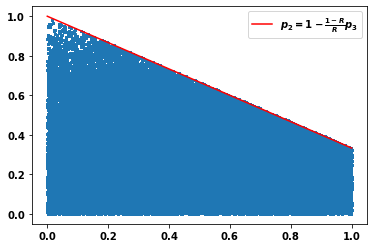

In [48]:
x = np.linspace(0, 1, 100).round(2)

y = 1 - (1 - df['c'].unique()[0]) / df['c'].unique()[0] * x

plt.plot(x, y, '-r', label=r'$p_2 = 1 - \frac{1 - R}{R} p_3$')

plt.scatter(eq_df['p3'], eq_df['p2'], s=3);

plt.legend();

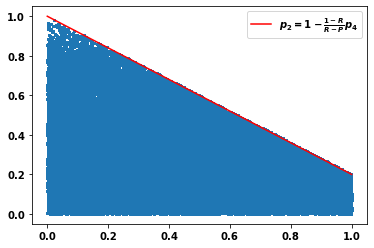

In [49]:
x = np.linspace(0, 1, 100).round(2)

y = 1 - ((1 -  df['c'].unique()[0]) / (df['c'].unique()[0] - df['b'].unique()[0])) * x

plt.plot(x, y, '-r', label=r'$p_2 = 1 - \frac{1 - R}{R - P} p_4$')

plt.scatter(eq_df['p4'], eq_df['p2'], s=3);

plt.legend();

In [6]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

In [8]:
import pandas as pd

In [10]:
# df2 = pd.read_csv("../reactive_equilibria.csv")

### Equilibria

In [8]:
per_player = df2.groupby('ID')['condition B'].all()

In [9]:
eq_players_ID = per_player[per_player == True].index

In [10]:
len(eq_players_ID)

53622

In [11]:
eq_df2 = df2[df2['ID'].isin(eq_players_ID)]

eq_df2['condition A'].unique()

array([ True, False])

### No Equilibria

In [12]:
no_eq_players_ID = per_player[per_player == False].index

print(len(no_eq_players_ID))

no_eq_df2 = df2[df2['ID'].isin(no_eq_players_ID)]

groups = no_eq_df2[no_eq_df2['condition B'] == False].groupby('ID')


46378


In [13]:
sets = []
ids = []
for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())


In [14]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

counter

NameError: name 'Counter' is not defined

In [59]:
sums = []
for label1 in [f"N{i}" for i in range(0, 16)]:
    for label2 in [f"N{i}" for i in range(0, 16)]:
        if label1 != label2:

            index = [i for i, s in enumerate(sets) if label1 in list(s)]

            index2 = [i for i, s in enumerate(sets) if label2 in list(s)]

            sums.append(len(set(index + index2)))

In [60]:
np.argmax(sums)

5

In [61]:
sums[5] == sums[90]

True

In [62]:
i = 0
for label1 in [f"N{i}" for i in range(0, 16)]:
    for label2 in [f"N{i}" for i in range(0, 16)]:
        i += 1
        
        if i in [5, 90]:
            print(label1, label2)

N0 N4
N5 N9


In [63]:
labels = [f"N{i}" for i in range(0, 16)]

In [64]:
idx_sets = []

for i, j, k in list(itertools.combinations(labels, r=3)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j, k))

In [65]:
idx_sets

[('N0', 'N6', 'N7')]

In [66]:
index = [i for i, s in enumerate(sets) if ("N0" not in list(s) and "N6" not in list(s) and "N7" not in list(s))]

# index2 = [i for i, s in enumerate(sets) if "N6" not in list(s)]

In [67]:
other_sets = [set(sets[i]) for i in index]

In [68]:
combos = list(itertools.product([0, 1], repeat=4))
deterministic_strategies = []
for (q1, q2, q3, q4) in combos:
    deterministic_strategies.append(
        [q1, q2, q1, q2, q3, q4, q3, q4, q1, q2, q1, q2, q3, q4, q3, q4]
    )

In [69]:
deterministic_strategies[6]

[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

In [70]:
N7 = [0, 1, 1, 1]
N0 = [0, 0, 0, 0]
N4 = [0, 1, 0, 0]
N5 = [0, 1, 0, 1]
N9 = [1, 0, 0, 1]
N6 = [0, 1, 1, 0]

### Plot equilibria

In [21]:
R, P = sym.symbols("R, P")

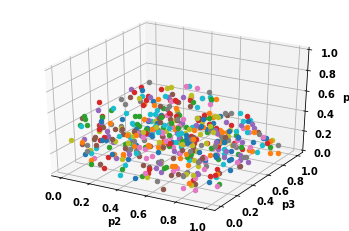

In [22]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')


for i, row in eq_df2[['p2', 'p5', 'p6']].drop_duplicates()[:500].iterrows():

    ax.scatter(row['p2'], row['p5'], row['p6'])
    
ax.set_zlim(0, 1)

ax.set_xlabel('p2')
ax.set_ylabel('p3')
ax.set_zlabel('p4')

plt.show()

In [73]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

M = transition_matrix(N7, [p_1, p_2, p_3, p_4],
                      bits=4, analytical=True)

ss = invariant_distribution_analytically(M)

In [74]:
ss

Matrix([[p_1**2*(1 - p_4)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1), p_1*(p_1**2*p_2*p_4 - p_1**2*p_2 - p_1**2*p_4**2 + p_1**2*p_4 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 - p_1*p_2*p_4 + p_1*p_2 + p_1*p_3*p_4**2 - p_1*p_3*p_4 + p_1*p_4 - p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1), p_1**3*(1 - p_4)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1), p_1**2*(p_1*p_4 - p_1 - p_4 + 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1), -p_1*(p_1*p_2*p_3*p_4 - p_1*p_2*p_3 - p_

In [75]:
exprN6 = ss @ sym.Matrix([R, 0, 1, P] * 4)

In [76]:
exprN0 = ss @ sym.Matrix([R, 0, 1, P] * 4)

In [77]:
exprN0[0].factor() - R

-R - p_1*(P*p_1*p_4 - P*p_1 - R*p_1**2*p_2*p_4 + R*p_1**2*p_2 + R*p_1**2*p_4**2 - R*p_1**2*p_4 + R*p_1*p_2*p_3*p_4 - R*p_1*p_2*p_3 + R*p_1*p_2*p_4 - R*p_1*p_2 - R*p_1*p_3*p_4**2 + R*p_1*p_3*p_4 + R*p_1*p_4 - R*p_1 - R*p_2*p_3*p_4 + R*p_2*p_3 + R*p_4 - R - p_1**2*p_2 + p_1**2*p_4 - p_1**2)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1)

In [78]:
[s.factor() for s in ss]

[-p_1**2*(p_4 - 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1),
 p_1*(p_4 - 1)*(p_1**2*p_2 - p_1**2*p_4 - p_1*p_2*p_3 - p_1*p_2 + p_1*p_3*p_4 + p_1 + p_2*p_3 - 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1),
 -p_1**3*(p_4 - 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1),
 p_1**2*(p_1 - 1)*(p_4 - 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 + p_1*p_3*p_4**2 - p_1*p_3 - p_1*p_4 + p_1 + p_2*p_3*p_4 - p_2*p_3 - p_4 + 1),
 -p_1*(p_4 - 1)*(p_1*p_2*p_3 - p_1*p_3*p_4 - p_2*p_3 + 1)/(p_1**3*p_2 - p_1**3*p_4 + p_1**3 - 3*p_1**2*p_4 + 3*p_1**2 - p_1*p_2*p_3*p_4 + p_1*p_2*p_3 +

In [259]:
ss

In [267]:
sym.init_printing(True)

In [138]:
(exprN6[0] - R).subs({p_1:1, P:0.1, R: 0.6}).simplify()

1.0*(0.4*p_2**3*p_3**3*p_4 - 0.8*p_2**3*p_3**2*p_4 + 0.8*p_2**3*p_3*p_4 - 0.4*p_2**3*p_4 - 0.6*p_2**2*p_3**4*p_4**2 + 0.6*p_2**2*p_3**4*p_4 + 1.5*p_2**2*p_3**3*p_4**2 - 2.3*p_2**2*p_3**3*p_4 - 2.3*p_2**2*p_3**2*p_4**2 + 4.4*p_2**2*p_3**2*p_4 - 0.5*p_2**2*p_3**2 + 2.6*p_2**2*p_3*p_4**2 - 4.4*p_2**2*p_3*p_4 + 1.0*p_2**2*p_3 - 1.2*p_2**2*p_4**2 + 1.7*p_2**2*p_4 - 0.5*p_2**2 + 1.2*p_2*p_3**4*p_4**3 - 1.2*p_2*p_3**4*p_4**2 - 4.2*p_2*p_3**3*p_4**3 + 5.0*p_2*p_3**3*p_4**2 - 0.4*p_2*p_3**3*p_4 + 5.5*p_2*p_3**2*p_4**3 - 6.8*p_2*p_3**2*p_4**2 - 0.5*p_2*p_3**2*p_4 + 1.0*p_2*p_3**2 - 4.3*p_2*p_3*p_4**3 + 6.1*p_2*p_3*p_4**2 - 0.3*p_2*p_3*p_4 - 1.5*p_2*p_3 + 1.2*p_2*p_4**3 - 1.9*p_2*p_4**2 + 0.2*p_2*p_4 + 0.5*p_2 - 0.6*p_3**4*p_4**4 + 0.6*p_3**4*p_4**3 + 2.3*p_3**3*p_4**4 - 2.7*p_3**3*p_4**3 + 0.4*p_3**3*p_4**2 - 3.0*p_3**2*p_4**4 + 4.1*p_3**2*p_4**3 - 1.1*p_3**2*p_4**2 + 0.5*p_3**2*p_4 - 0.5*p_3**2 + 2.1*p_3*p_4**4 - 3.6*p_3*p_4**3 + 1.4*p_3*p_4**2 - 0.4*p_3*p_4 + 0.5*p_3 - 0.8*p_4**4 + 2.4*p_4**3 

In [331]:
(exprN7[0] - R).factor().subs({p_1:1, P:0.1, R: 0.6})

-(-1.0*p_2 - 0.6*p_3*p_4**2 + 0.6*p_3*p_4 + 0.6*p_4**2 + 1.7*p_4 - 2.3)/(p_2 + p_3*p_4**2 - p_3 - 6*p_4 + 6)

In [23]:
(exprN0[0] - R).factor().subs({p_1:1, P:0.1, R: 0.6})

0.9*p_4 - 0.5

In [21]:
0.5 / 0.9

0.5555555555555556

In [29]:
def pi_N7(p2, p3, p4):
    return -(-0.4 * p2 + 0.6 * p3 * p4 - 0.6 * p3 + 0.6*p4**2 - 1.9*p4 + 1.3)/(p2 + p3*p4**2 - p3 - 6*p4 + 6)

In [30]:
def pi_N0(p2, p3, p4):
    return 0.9 * p4 - 0.5

In [31]:
def pi_N6(p2, p3, p4):
    expression = (
        1.0
        * (
            0.4 * p2 ** 3 * p3 ** 3 * p4
            - 0.8 * p2 ** 3 * p3 ** 2 * p4
            + 0.8 * p2 ** 3 * p3 * p4
            - 0.4 * p2 ** 3 * p4
            - 0.6 * p2 ** 2 * p3 ** 4 * p4 ** 2
            + 0.6 * p2 ** 2 * p3 ** 4 * p4
            + 1.5 * p2 ** 2 * p3 ** 3 * p4 ** 2
            - 2.3 * p2 ** 2 * p3 ** 3 * p4
            - 2.3 * p2 ** 2 * p3 ** 2 * p4 ** 2
            + 4.4 * p2 ** 2 * p3 ** 2 * p4
            - 0.5 * p2 ** 2 * p3 ** 2
            + 2.6 * p2 ** 2 * p3 * p4 ** 2
            - 4.4 * p2 ** 2 * p3 * p4
            + 1.0 * p2 ** 2 * p3
            - 1.2 * p2 ** 2 * p4 ** 2
            + 1.7 * p2 ** 2 * p4
            - 0.5 * p2 ** 2
            + 1.2 * p2 * p3 ** 4 * p4 ** 3
            - 1.2 * p2 * p3 ** 4 * p4 ** 2
            - 4.2 * p2 * p3 ** 3 * p4 ** 3
            + 5.0 * p2 * p3 ** 3 * p4 ** 2
            - 0.4 * p2 * p3 ** 3 * p4
            + 5.5 * p2 * p3 ** 2 * p4 ** 3
            - 6.8 * p2 * p3 ** 2 * p4 ** 2
            - 0.5 * p2 * p3 ** 2 * p4
            + 1.0 * p2 * p3 ** 2
            - 4.3 * p2 * p3 * p4 ** 3
            + 6.1 * p2 * p3 * p4 ** 2
            - 0.3 * p2 * p3 * p4
            - 1.5 * p2 * p3
            + 1.2 * p2 * p4 ** 3
            - 1.9 * p2 * p4 ** 2
            + 0.2 * p2 * p4
            + 0.5 * p2
            - 0.6 * p3 ** 4 * p4 ** 4
            + 0.6 * p3 ** 4 * p4 ** 3
            + 2.3 * p3 ** 3 * p4 ** 4
            - 2.7 * p3 ** 3 * p4 ** 3
            + 0.4 * p3 ** 3 * p4 ** 2
            - 3.0 * p3 ** 2 * p4 ** 4
            + 4.1 * p3 ** 2 * p4 ** 3
            - 1.1 * p3 ** 2 * p4 ** 2
            + 0.5 * p3 ** 2 * p4
            - 0.5 * p3 ** 2
            + 2.1 * p3 * p4 ** 4
            - 3.6 * p3 * p4 ** 3
            + 1.4 * p3 * p4 ** 2
            - 0.4 * p3 * p4
            + 0.5 * p3
            - 0.8 * p4 ** 4
            + 2.4 * p4 ** 3
            - 2.4 * p4 ** 2
            + 0.8 * p4
        )
        / (
            1.0 * p2 ** 3 * p3 ** 3 * p4
            - 2.0 * p2 ** 3 * p3 ** 2 * p4
            + 2.0 * p2 ** 3 * p3 * p4
            - 1.0 * p2 ** 3 * p4
            + 2.0 * p2 ** 2 * p3 ** 4 * p4 ** 2
            - 2.0 * p2 ** 2 * p3 ** 4 * p4
            - 11.0 * p2 ** 2 * p3 ** 3 * p4 ** 2
            + 9.0 * p2 ** 2 * p3 ** 3 * p4
            + 19.0 * p2 ** 2 * p3 ** 2 * p4 ** 2
            - 16.0 * p2 ** 2 * p3 ** 2 * p4
            + 1.0 * p2 ** 2 * p3 ** 2
            - 17.0 * p2 ** 2 * p3 * p4 ** 2
            + 17.0 * p2 ** 2 * p3 * p4
            - 2.0 * p2 ** 2 * p3
            + 7.0 * p2 ** 2 * p4 ** 2
            - 8.0 * p2 ** 2 * p4
            + 1.0 * p2 ** 2
            - 4.0 * p2 * p3 ** 4 * p4 ** 3
            + 4.0 * p2 * p3 ** 4 * p4 ** 2
            + 19.0 * p2 * p3 ** 3 * p4 ** 3
            - 17.0 * p2 * p3 ** 3 * p4 ** 2
            - 1.0 * p2 * p3 ** 3 * p4
            - 28.0 * p2 * p3 ** 2 * p4 ** 3
            + 24.0 * p2 * p3 ** 2 * p4 ** 2
            + 4.0 * p2 * p3 ** 2 * p4
            - 2.0 * p2 * p3 ** 2
            + 20.0 * p2 * p3 * p4 ** 3
            - 24.0 * p2 * p3 * p4 ** 2
            + 1.0 * p2 * p3 * p4
            + 3.0 * p2 * p3
            - 5.0 * p2 * p4 ** 3
            + 9.0 * p2 * p4 ** 2
            - 3.0 * p2 * p4
            - 1.0 * p2
            + 2.0 * p3 ** 4 * p4 ** 4
            - 2.0 * p3 ** 4 * p4 ** 3
            - 9.0 * p3 ** 3 * p4 ** 4
            + 8.0 * p3 ** 3 * p4 ** 3
            + 1.0 * p3 ** 3 * p4 ** 2
            + 13.0 * p3 ** 2 * p4 ** 4
            - 13.0 * p3 ** 2 * p4 ** 3
            - 1.0 * p3 ** 2 * p4
            + 1.0 * p3 ** 2
            - 9.0 * p3 * p4 ** 4
            + 13.0 * p3 * p4 ** 3
            - 3.0 * p3 * p4
            - 1.0 * p3
            + 3.0 * p4 ** 4
            - 9.0 * p4 ** 3
            + 9.0 * p4 ** 2
            - 3.0 * p4
        )
    )
    return expression

In [32]:
x = np.arange(0, 1 - 10 ** -5, 0.01)
y = np.arange(0, 1 - 10 ** -5, 0.01)
z = np.arange(0, 1 - 10 ** -5, 0.01)

xv, yv, zv = np.meshgrid(x, y, z)

In [33]:
Is6, Js6, Zs6 = np.where(np.isclose(pi_N6(xv, yv, zv), 0, atol=10 ** - 3))

<ipython-input-31-c4b0f1730d22>:3: RuntimeWarning: invalid value encountered in true_divide
  1.0


In [34]:
Is0, Js0, Zs0 = np.where(np.isclose(pi_N0(xv, yv, zv), 0, atol=4.5 * 10 ** - 3))

In [35]:
Is7, Js7, Zs7 = np.where(np.isclose(pi_N7(xv, yv, zv), 0, atol=3 * 10 ** - 3))

In [36]:
len(Is0)

10000

In [37]:
colors = ['tab:blue', "tab:orange", "tab:green"]
labels = ['N0', 'N6', 'N7']

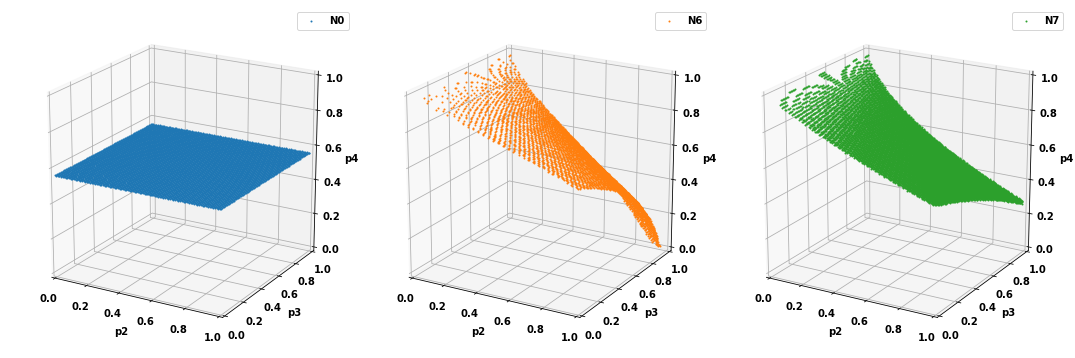

In [38]:
fig = plt.figure(figsize=(20, 10))


axes = []

n = 1000

for index in [(2, 4, i) for i in range(1, 4)]:
    axes.append(fig.add_subplot(*index, projection="3d"))
    
    
for k, indices in enumerate([[Is0, Js0, Zs0], [Is6, Js6, Zs6], [Is7, Js7, Zs7]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            axes[k].scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            color=colors[k], 
                            s=1)
            
        axes[k].scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                color=colors[k], 
                s=1,
                label=labels[k])
        
        axes[k].view_init(20, -60)
        
        axes[k].legend()
        
        axes[k].set_xlim(0, 1)
        axes[k].set_ylim(0, 1)
        axes[k].set_zlim(0, 1)
        
        axes[k].set_xlabel('p2')
        axes[k].set_ylabel('p3')
        axes[k].set_zlabel('p4')
    
fig.tight_layout()

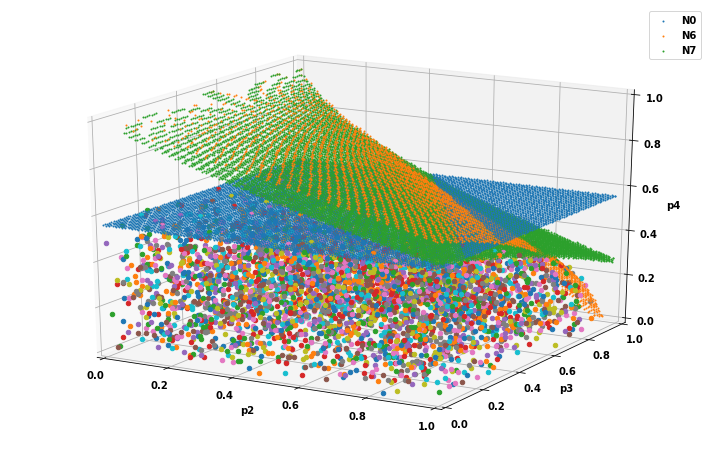

In [94]:
fig = plt.figure(figsize=(10, 6.5))

n = 2000
axes = fig.add_subplot(projection="3d")
for k, indices in enumerate([[Is0, Js0, Zs0], [Is6, Js6, Zs6], [Is7, Js7, Zs7]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            axes.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            color=colors[k], 
                            s=1)
            
        axes.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                color=colors[k], 
                s=1,
                label=labels[k])
        
        axes.view_init(20, -60)
        
        axes.legend()
        
        axes.set_xlim(0, 1)
        axes.set_ylim(0, 1)
        axes.set_zlim(0, 1)
        
        axes.set_xlabel('p2')
        axes.set_ylabel('p3')
        axes.set_zlabel('p4')
        


for i, row in eq_df2[['p2', 'p5', 'p6']].drop_duplicates()[:5000].iterrows():

    axes.scatter(row['p2'], row['p5'], row['p6'])
    
    
fig.tight_layout()

In [40]:
sample = eq_df2[['p2', 'p5', 'p6']].drop_duplicates().sample(frac=0.3)

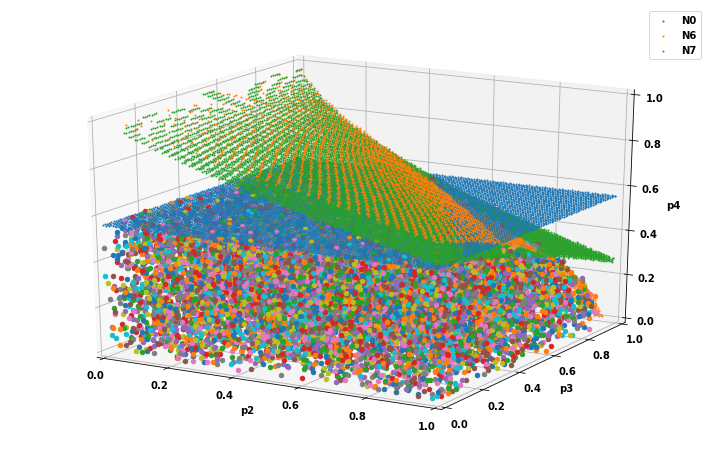

In [41]:
fig = plt.figure(figsize=(10, 6.5))

n = 2000
axes = fig.add_subplot(projection="3d")
for k, indices in enumerate([[Is0, Js0, Zs0], [Is6, Js6, Zs6], [Is7, Js7, Zs7]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            axes.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            color=colors[k], 
                            s=1)
            
        axes.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                color=colors[k], 
                s=1,
                label=labels[k])
        
        axes.view_init(20, -60)
        
        axes.legend()
        
        axes.set_xlim(0, 1)
        axes.set_ylim(0, 1)
        axes.set_zlim(0, 1)
        
        axes.set_xlabel('p2')
        axes.set_ylabel('p3')
        axes.set_zlabel('p4')
        


for i, row in sample[['p2', 'p5', 'p6']].drop_duplicates().iterrows():

    axes.scatter(row['p2'], row['p5'], row['p6'])
    
    
fig.tight_layout()

In [23]:
len(eq_df2[['p2', 'p5', 'p6']].drop_duplicates())

51047

In [92]:
len(eq_df2[['p2', 'p5', 'p6']].drop_duplicates())

51047

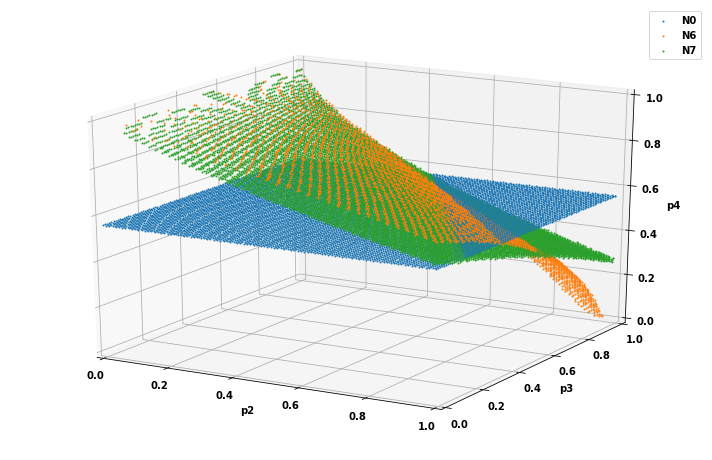

In [91]:
fig = plt.figure(figsize=(10, 6.5))

n = 2000
axes = fig.add_subplot(projection="3d")
for k, indices in enumerate([[Is0, Js0, Zs0], [Is6, Js6, Zs6], [Is7, Js7, Zs7]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            axes.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            color=colors[k], 
                            s=1)
            
        axes.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                color=colors[k], 
                s=1,
                label=labels[k])
        
        axes.view_init(20, -60)
        
        axes.legend()
        
        axes.set_xlim(0, 1)
        axes.set_ylim(0, 1)
        axes.set_zlim(0, 1)
        
        axes.set_xlabel('p2')
        axes.set_ylabel('p3')
        axes.set_zlabel('p4')
    
fig.tight_layout()

In [242]:
import os

os.chdir("../src/")

In [243]:
eq = SourceFileLoader("eq", "../src/equilibria.py").load_module()

import eq

/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


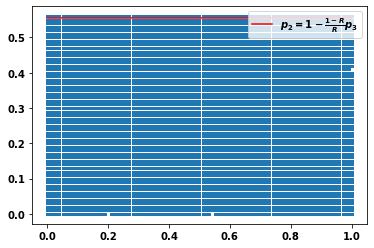

In [265]:
x = np.linspace(0, 1, 100).round(2)

y1 = [(0.6 - 0.1) / (1 - 0.1) for _ in x]

plt.plot(x, y1, '-r', label=r'$p_2 = 1 - \frac{1 - R}{R} p_3$')

plt.scatter(eq_df['p5'], eq_df['p6'], s=3);


plt.legend();

In [271]:
points = []
for i, group in eq_df.groupby('ID'):
    points.append((group['p2'], group['p5']))

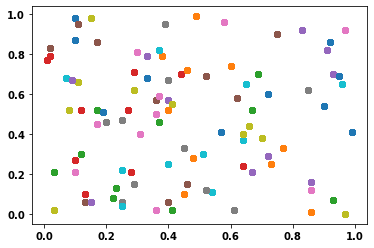

In [273]:
for x, y in points[:100]:
    plt.scatter(x, y)

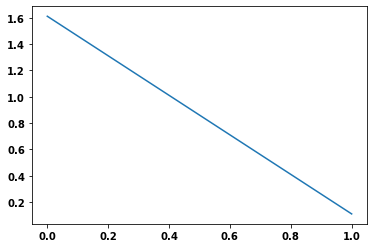

In [261]:
x = np.linspace(0, 1, 100).round(2)

y = 0.916667 - 1.5 * x + 2.25 * 0.555556 ** 2

plt.plot(x, y);

In [257]:
def condition(p2, p3):
    return p3 <= 0.916667 - 1.5 * p2 + 2.25 * 0.555556 ** 2

In [259]:
condition(0.59, 0.6)

True

In [258]:
eq_df

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,q14,q15,q16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,13567,1,0.59,1,0.59,0.60,0.34,0.60,0.34,1,...,0,0,0,N0,0.6,0.41,True,True,0.6,0.1
1,13567,1,0.59,1,0.59,0.60,0.34,0.60,0.34,1,...,1,0,1,N1,0.6,0.48,True,True,0.6,0.1
2,13567,1,0.59,1,0.59,0.60,0.34,0.60,0.34,1,...,0,1,0,N2,0.6,0.46,True,True,0.6,0.1
3,13567,1,0.59,1,0.59,0.60,0.34,0.60,0.34,1,...,1,1,1,N3,0.6,0.51,True,True,0.6,0.1
4,13567,1,0.59,1,0.59,0.60,0.34,0.60,0.34,1,...,0,0,0,N4,0.6,0.47,True,True,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,40557,1,0.30,1,0.30,0.98,0.17,0.98,0.17,1,...,1,1,1,N11,0.6,0.60,True,True,0.6,0.1
12,40557,1,0.30,1,0.30,0.98,0.17,0.98,0.17,1,...,0,0,0,N12,0.6,0.60,True,True,0.6,0.1
13,40557,1,0.30,1,0.30,0.98,0.17,0.98,0.17,1,...,1,0,1,N13,0.6,0.60,True,True,0.6,0.1


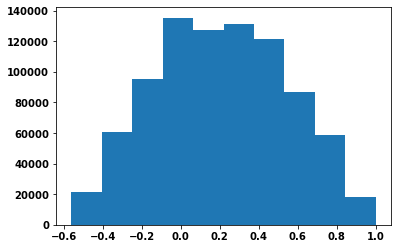

In [210]:
plt.hist(eq_df['p2'] -  eq_df['p6']);

/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


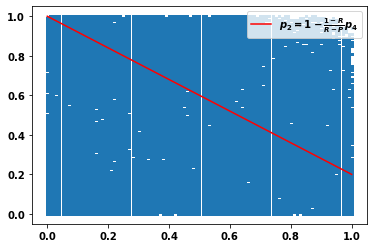

In [194]:
x = np.linspace(0, 1, 100).round(2)

y1 = 1 - ((1 -  0.6) / (0.6 - 0.1)) * x

plt.plot(x, y1, '-r', label=r'$p_2 = 1 - \frac{1 - R}{R - P} p_4$')

plt.scatter(eq_df['p2'], eq_df['p5'], s=3);

plt.legend();

### Memory-one Payoffs

In [220]:
import sympy as sym

In [221]:
import os

In [222]:
os.chdir("../src/")

In [223]:
from importlib.machinery import SourceFileLoader

equilibria = SourceFileLoader("equilibria", "equilibria.py").load_module()

from equilibria import *

In [224]:
p1, p2, p3, p4 = sym.symbols("p1, p2, p3, p4")
q1, q2, q3, q4 = sym.symbols("q1, q2, q3, q4")

In [225]:
def M_symbolically(player, opponent):
    """
    Returns a Markov transition matrix for a game of memory one strategies.
    """
    return sym.Matrix(
        [
            [
                player[0] * opponent[0],
                player[0] * (1 - opponent[0]),
                (1 - player[0]) * opponent[0],
                (1 - player[0]) * (1 - opponent[0]),
            ],
            [
                player[1] * opponent[2],
                player[1] * (1 - opponent[2]),
                (1 - player[1]) * opponent[2],
                (1 - player[1]) * (1 - opponent[2]),
            ],
            [
                player[2] * opponent[1],
                player[2] * (1 - opponent[1]),
                (1 - player[2]) * opponent[1],
                (1 - player[2]) * (1 - opponent[1]),
            ],
            [
                player[3] * opponent[3],
                player[3] * (1 - opponent[3]),
                (1 - player[3]) * opponent[3],
                (1 - player[3]) * (1 - opponent[3]),
            ],
        ]
    )


In [226]:
M = M_symbolically([p1, p2, p3, p4], [q1, q2, q3, q4])
M

Matrix([
[p1*q1, p1*(1 - q1), q1*(1 - p1), (1 - p1)*(1 - q1)],
[p2*q3, p2*(1 - q3), q3*(1 - p2), (1 - p2)*(1 - q3)],
[p3*q2, p3*(1 - q2), q2*(1 - p3), (1 - p3)*(1 - q2)],
[p4*q4, p4*(1 - q4), q4*(1 - p4), (1 - p4)*(1 - q4)]])

In [227]:
ss = invariant_distribution_analytically(M)

In [228]:
Sx = payoffs(0.6, 0.1, dim=1)
Sy = coplayer_payoffs(0.6, 0.1, dim=1)

**Against ALLD**

In [229]:
expr = (ss.subs({p1:0, p2:0, p3:0, p4:0}) @ Sx)[0].factor()

In [231]:
expr.factor()

1.0*(0.1*q2 - 1.0*q4 - 0.1)/(q2 - q4 - 1)

In [74]:
expr2 = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sy)[0].simplify()

In [77]:
(expr - expr2).simplify()

1.0*p4/(p2 - p4 - 1)

**Against (0, 1, 1, 1)**

In [78]:
expr = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sx)[0].factor()

In [79]:
expr2 = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sy)[0].simplify()

In [87]:
(expr - expr2).subs({p1: 1}).simplify()

1.0*(p2 + p3 - 1)/(1.0*p2 - 2.0*p3 - 1.0)

**General case**

In [88]:
R, P = sym.symbols("R, P")

In [89]:
Sx = payoffs(R, P, dim=1)
Sy = coplayer_payoffs(R, P, dim=1)

In [90]:
expr = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sx)[0].factor()

In [91]:
expr2 = (ss.subs({q1:0, q2:0, q3:0, q4:0}) @ Sy)[0].simplify()

In [92]:
(expr - expr2).simplify()

p4/(p2 - p4 - 1)

In [94]:
expr = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sx)[0].factor()

In [95]:
expr2 = (ss.subs({q1:0, q2:1, q3:1, q4:1}) @ Sy)[0].simplify()

In [96]:
(expr - expr2).subs({p1: 1}).simplify()

(p2 + p3 - 1)/(p2 - 2*p3 - 1)

## Reactive case

In [214]:
p1, p2, p3, p4 = np.random.random((1, 4)).round(2)[0]

In [222]:
p1 = 1

In [223]:
strategy = [p1, p2, p1, p2, p3, p4, p3, p4, p1, p2, p1, p2, p3, p4, p3, p4]

In [228]:
combos = list(
    itertools.product([0, 1], repeat=4)
) 

In [230]:
deterministic_strategies = []
for (q1, q2, q3, q4) in combos:
    deterministic_strategies.append([q1, q2, q1, q2, q3, q4, q3, q4, q1, q2, q1, q2, q3, q4, q3, q4])
    

In [232]:
len(deterministic_strategies)

16